## 01. 유방암 데이터 셋 살펴보기 

In [11]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
유방암 데이터의 형태 : (569, 30)


### (가) 입력, 목표 feasure 이름 확인

In [3]:
print("featuer_names : {}".format(cancer['feature_names']))
print("target_names : {}".format(cancer['target_names']))

featuer_names : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target_names : ['malignant' 'benign']


## 02. KNN 시각화 확인

In [7]:
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

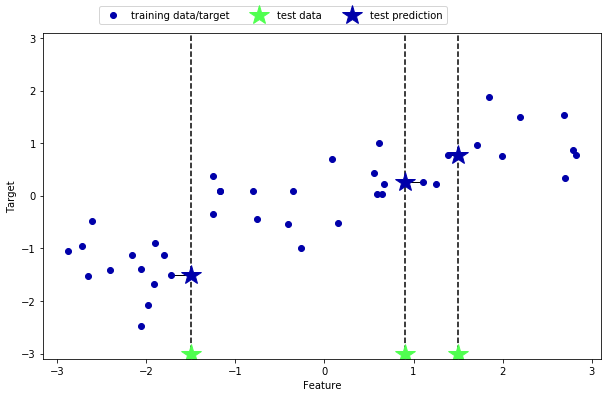

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

### 별 3개가 테스트 데이터가 된다.
### 별에 가장 가까운 1개의 값을 이용하여 예측을 수행한다.

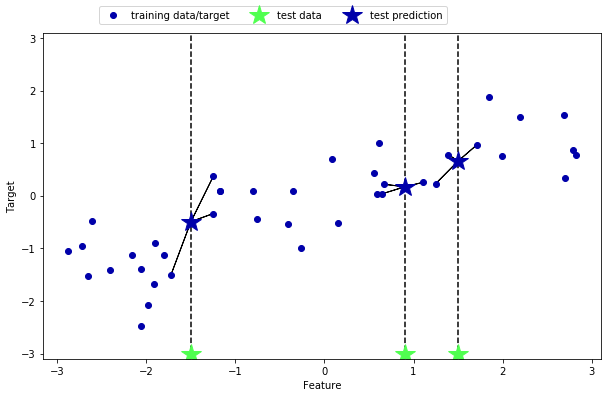

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## 04. 균등 분포를 갖는 난수를 10개 발생시키기

In [10]:
import numpy as np
rnd = np.random.RandomState(42)
x = rnd.uniform(-3, 3, size=10)
x

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547])

## 05. x의 값을 sin 함수를 적용시켜 y값 구하기

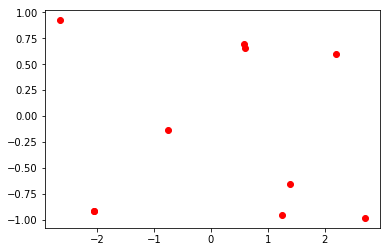

In [13]:
y = np.sin(4 * x)
plt.plot(x, y, 'ro')

## 06. x의 값을 sin 함수를 적용시켜 y값 구하기

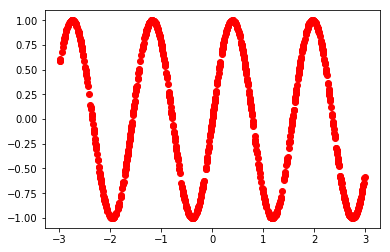

In [16]:
x = rnd.uniform(-3, 3, size=1000)
x
y = np.sin(4 * x)
plt.plot(x, y, 'ro')

## 07. 정규 분포 포함 난수

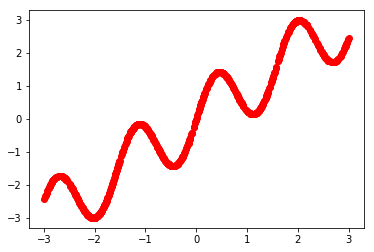

In [22]:
x = rnd.uniform(-3, 3, size=1000)
x
y = np.sin(4 * x) + x
plt.plot(x, y, 'ro')

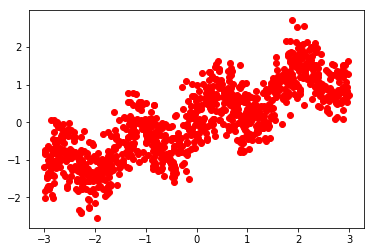

In [23]:
x = rnd.uniform(-3, 3, size=1000)
x
y = np.sin(4 * x) + x
y1 = (y + rnd.normal(size=1000)) / 2
plt.plot(x, y1, 'ro')

## 08. reshape 함수 이해

In [24]:
a = np.zeros((10, 2))
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [26]:
b = np.arange(6).reshape((3, 2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [27]:
bt = b.reshape((2, 3))
bt

array([[0, 1, 2],
       [3, 4, 5]])

In [28]:
a = np.array([[1,2,3], [4,5,6]])
np.reshape(a, 6)

array([1, 2, 3, 4, 5, 6])

In [29]:
np.reshape(a, (3,-1))

array([[1, 2],
       [3, 4],
       [5, 6]])

## 09. 정규화 이해

#### (가) MinMaxScaler를 이용하여 정규화 수행
<pre>
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
</pre>
\begin{eqnarray}
\tilde{d_i} & := & \frac{d_i - \min\left\{d\right\}}{\max\left\{d\right\} - \min\left\{d\right\}}
\end{eqnarray}
URL : http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

boston keys : dict_keys(['data', 'target', 'feature_names', 'DESCR'])
boston features : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
boston target : [ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23. 

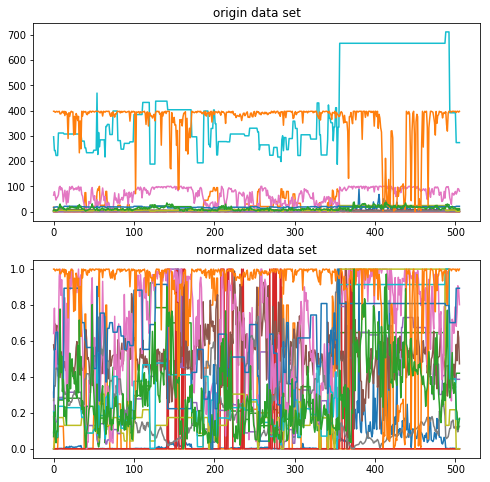

In [31]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

boston = load_boston()  # 데이터 셋 불러오기
print("boston keys : {}".format(boston.keys()))
print("boston features : {}".format(boston['feature_names']))
print("boston target : {}".format(boston['target']))

## from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
## 값의 정규화를 수행해 준다.
X2 = MinMaxScaler().fit_transform(boston.data)  # 입력 데이터 정규화
X2

## 정규화된 값을 그래프를 통해 확인해 보자.
plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(boston.data)
plt.title("origin data set")
plt.subplot(2, 1, 2)
plt.plot(X2)
plt.title("normalized data set")

In [33]:
X = boston.data         # 입력 데이터 
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X.shape

(506, 104)

## 10. PolynomialFeature 함수

In [36]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [37]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)


array([[  1.,   0.,   1.,   0.],
       [  1.,   2.,   3.,   6.],
       [  1.,   4.,   5.,  20.]])

## 11. 교차 검증

In [9]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

array = dataset.values
X = array[:,0:4]             # 1,2,3,4 열 선택
Y = array[:,4]               # 5열(Species) 선택
validation_size = 0.20      # 평가용 데이터 셋 비율
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                       test_size=validation_size, random_state=seed)

In [11]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [12]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold

KFold(n_splits=10, random_state=7, shuffle=False)

In [13]:
model = KNeighborsClassifier()

# model_selection.cross_val_score : 교차 검증에 의해 점수를 평가한다.
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) # 교차검증
cv_results

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.91666667,  1.        ,  1.        ,  0.91666667])

## 12. ravel() 함수

In [1]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ravel(x))

[1 2 3 4 5 6]


## 13. bincount() 함수

<pre>
음수가 아닌 int 배열로 각 값의 발생 횟수를 카운트합니다.
</pre>

In [4]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [5]:
np.bincount(np.arange(5))

array([1, 1, 1, 1, 1], dtype=int64)

In [9]:
w = np.array([0.5, 0.1, 0.2, 0.2, 0.2]) # weights - 각각의 값(0, 1, 2)에 대한 총 Weight의 합
x = np.array([0, 1, 1, 2, 2])
np.bincount(x,  weights=w)

array([ 0.5,  0.3,  0.4])

## 14. np.unique() 함수

In [10]:
np.unique([1, 1, 2, 2, 3, 3])

array([1, 2, 3])

In [11]:
a = np.array([[1, 1], [2, 3]])
np.unique(a)

array([1, 2, 3])

TypeError: unique() got an unexpected keyword argument 'axis'